## Задание 1(4)

Функция плотности исследуемого распределения:
$$f_\theta(x) = \frac{3x^2}{\sqrt{2\pi}} \cdot \exp{\left(-\frac{(\theta - x^3)^2}{2} \right)}$$

Функция правдоподобия для выборки $X = (X_1, ..., X_n)$:

$$L(\theta | X) = \prod_{i=1}^n \left[ \frac{3X_i^2}{\sqrt{2\pi}} \cdot \exp{\left( -\frac{(\theta - X_i^3)^2}{2} \right)} \right]$$

Находим логарифм:

$$ln(L(\theta | X)) = \sum_{i=1}^n \left[ -\frac{1}{2}ln(2\pi) - ln(3X_i^2) - \frac{(\theta - X_i^3)^2}{2} \right]$$

Находим частную производную и приравниваем к 0:

$$\frac{\partial ln(L(\theta | X))}{\partial \theta} = \sum_{i=1}^n -(\theta - X_i^3) = -n\theta + \sum_{i=1}^n {X_i^3}$$

$$-n\theta + \sum_{i=1}^n {X_i^3} = 0 \implies \theta = \overline{X^3}$$

Значит $\theta$ - выборочный 3-й момент, из чего следует, что $\theta$ - состоятельная, несмещенная и асимптотически нормальная оценка. Помимо этого, так как оценка получена методом максимального правдоподобия, то $\theta$ также является асимптотически эффективной

### Несмещенность (доказательство)
Как известно, выборочный нецентральный момент является несмещенной оценкой, то есть
$$E(\overline{X^3}) = \alpha_3$$

Докажем, что параметр $\theta$ и есть 3-й теоретический момент распределения с плотностью 
$$f_\theta(x) = \frac{3x^2}{\sqrt{2\pi}} \cdot \exp{\left(-\frac{(\theta - x^3)^2}{2} \right)}$$

По формуле для момента абсолютно непрерывного распределения:
$$\alpha_3 = \int_{-\infty}^{\infty} x^3 \cdot \frac{3x^2}{\sqrt{2\pi}} \cdot \exp{\left(-\frac{(\theta - x^3)^2}{2} \right)} \; dx 
= [x^3 = \tau] = \int_{-\infty}^{\infty} \frac{3\tau^{\frac{5}{3}}}{\sqrt{2\pi}} \cdot \exp{\left(-\frac{(\theta - \tau)^2}{2} \right)} \; d (\sqrt[3]{\tau}) 
= \int_{-\infty}^{\infty} \frac{\tau}{\sqrt{2\pi}} \cdot \exp{\left(-\frac{(\theta - \tau)^2}{2} \right)} \; d (\tau) 
= \theta$$

Последнее равенство верно, так как $\int_{-\infty}^{\infty} \frac{\tau}{\sqrt{2\pi}} \cdot \exp{\left(-\frac{(\theta - \tau)^2}{2} \right)} \; d (\tau)$ - формула для матожидания нормального распределения $N(\theta, 1)$

Значит $E(\overline{X^3}) = \alpha_3 = \theta$ и полученная оценка является несмещенной



In [25]:
import random
from matplotlib import pyplot as plt
from scipy.stats import norm, moment

Условия, при которых будут проводиться эксперименты (размеры и количество выборок, теоретическое значение $\theta$):

In [26]:
sample_sizes = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
sample_count = 1000
theoretical_theta = 5

Функции вычисления выборочных моментов

In [27]:
def sample_moment(sample, order):
    return moment(sample, moment=order, center=0)

def sample_central_moment(sample, order):
    mean = sample_moment(sample, 1)
    return moment(sample, moment=order, center=mean)

Функции для генерации выборки с заданной функцией плотности.

Можно заметить, что наша функция распределения - это просто композиция функции стандартного нормального распределения $\Phi(x)$ и $h(x) = x^3 - \theta$ (если возьмем производную композиции, то получим в точности плотность нашего распределения):

$$(\Phi(h(x)))' = h'(x) \cdot \Phi'(h(x)) = 3x^2 \cdot \frac{1}{\sqrt{2\pi}}  \exp\left\{-\frac{(x^3 - \theta)^2}{2}\right\}$$

Тогда обратная функция к функции распределения:

$$F^{-1}(x) = (\Phi(h(x)))^{-1} = h^{-1}(\Phi^{-1}(x)) = \sqrt[3]{\Phi^{-1}(x) + \theta} \text{, }$$
где $\Phi^{-1}(x)$ - квантиль стандартного нормального распределения

Также известно, что $F^{-1}(U[0, 1])$ ведет себя как случайная величина $F(x)$, значит будем генерировать величину из $U[0, 1]$ и применять к ней $F^{-1}(x)$

In [28]:
def cube_root(x):
    if x >= 0: return x ** (1 / 3)
    return -(-x) ** (1 / 3)

def inv_distribution_f(x):
    return cube_root(norm.ppf(x) + theoretical_theta)

def generate_sample(size):
    return [inv_distribution_f(random.random()) for _ in range(size)]

### Эксперимент:

In [29]:
def print_hist(sample, bins=50):
    fig, ax = plt.subplots(1, 1)
    ax.hist(sample, bins=bins, density=True, color='royalblue')
    plt.show()

Size 1
	Mean: -0.001928
	Var: 0.983398
	Count > 1e-1: 929
	Histogram for the difference between sample theta and the theoretical theta:


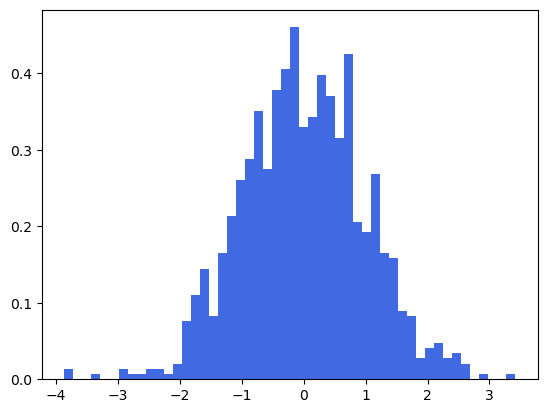

Size 2
	Mean: 0.016235
	Var: 0.483831
	Count > 1e-1: 896
	Histogram for the difference between sample theta and the theoretical theta:


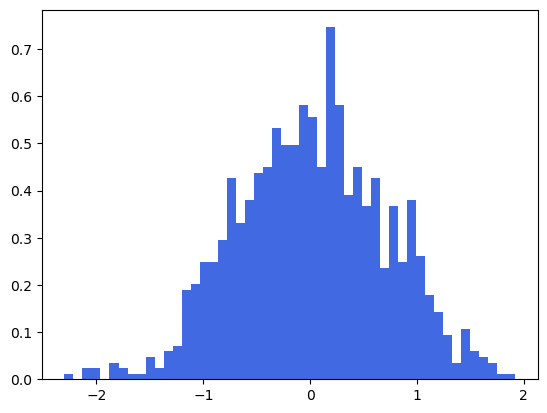

KeyboardInterrupt: 

In [30]:
def main():
    for size in sample_sizes:
        diffs = []
        for _ in range(sample_count):
            sample = generate_sample(size)
            diffs.append(sample_moment(sample, 3) - theoretical_theta)

        print("Size %d" % size)
        print("\tMean: %f" % sample_moment(diffs, 1)) # mean
        print("\tVar: %f" % sample_central_moment(diffs, 2)) # variance
        print("\tCount > 1e-1: %d" % len(list(filter(lambda x: abs(x) > 1e-1, diffs))))
        print("\tHistogram for the difference between sample theta and the theoretical theta:")
        print_hist(diffs)

if __name__ == '__main__':
    main()